# Homework Assignment 3 
## Data Analysis for STP

Task 1). Pick appropriate segmentation bases and run a cluster analysis for segmentation.

Task 2). Determine the number of segments and profit each segment.

Task 3). Suggest a few segments as target segments and how to reach them.

Task 4). Draw a perceptual map with three key perception variables and comment your findings.

### Brands Segmenation
In order to make the segmentation of the different Beer Brands, I transposed the columns and rows in excel to define each cluster based on the characteristics of the beer.

In [1]:
#missing package installation (in case its missing)
#conda install -c districtdatalabs yellowbrick

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
# Load the data into pandas dataframe
data = pd.read_excel("C:/Users/laila/OneDrive/Documentos/UTS/24753 Customer Analytics/A3/Kirin_Perception.xlsx") 

In [4]:
#Small dataset with 11 observations and 18 attributes
data.shape

(11, 18)

In [5]:
# Each observation refeer to a Beer Brand, while the attributes refer to customer perception about the beer. 
data.head(10)

,Brands,Rich full-bodied taste,Good taste,No aftertaste,Refreshing,Light,Lower price,Good value for money,Prestigious-popular,Masculine,Country with brewing tradition,For young people,Gives buzz,Drink at picnics & outings,Drink at bar,Drink with friends,For home after work,To serve guests at home
0,Amstel Light,3.1,3.5,3.3,3.5,3.6,2.1,2.8,3.4,2.5,3.5,2.8,2.4,3.3,3.5,3.5,3.2,3.6
1,Bass,3.8,3.9,2.3,2.8,1.3,1.6,2.7,2.5,3.9,3.3,1.8,3.1,2.4,3.7,3.5,3.8,3.1
2,Becks,3.7,3.8,2.8,3.5,2.0,1.7,2.6,3.3,3.1,3.8,2.1,2.9,3.1,3.5,3.6,3.4,3.6
3,Corona,3.3,3.5,3.2,3.6,2.6,2.0,2.7,3.1,2.9,2.3,2.6,2.5,3.3,3.5,3.5,3.5,3.2
4,Dos Equis,3.8,3.9,2.8,3.6,1.8,2.2,3.4,2.6,2.9,2.7,2.4,2.5,3.5,3.3,3.7,3.4,3.5
5,Heineken,3.5,3.5,2.9,3.3,1.8,2.2,2.0,3.1,3.3,2.3,2.1,2.9,3.3,3.1,3.5,3.2,3.0
6,Kirin,3.6,3.6,2.7,3.3,2.3,1.8,2.6,3.1,3.0,3.5,2.4,2.8,3.1,3.4,3.5,3.5,3.5
7,Molson,2.8,2.9,2.6,2.8,2.2,1.9,2.4,2.5,2.3,2.4,2.2,2.4,2.5,2.6,2.8,2.7,2.8
8,Moosehd,3.5,3.7,3.1,3.6,2.6,2.1,2.9,3.4,2.8,3.1,2.6,2.8,3.4,3.4,3.5,3.5,3.6
9,Sapporo,3.4,3.5,2.9,3.0,1.9,1.4,2.0,3.0,2.4,2.9,3.1,3.1,3.3,3.4,3.5,3.5,3.5


In [6]:
#Besides the name of the Brands, all other variables are numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brands                          11 non-null     object 
 1   Rich full-bodied taste          11 non-null     float64
 2   Good taste                      11 non-null     float64
 3   No aftertaste                   11 non-null     float64
 4   Refreshing                      11 non-null     float64
 5   Light                           11 non-null     float64
 6   Lower price                     11 non-null     float64
 7   Good value for money            11 non-null     float64
 8   Prestigious-popular             11 non-null     float64
 9   Masculine                       11 non-null     float64
 10  Country with brewing tradition  11 non-null     float64
 11  For young people                11 non-null     float64
 12  Gives buzz                      11 non

In [7]:
#statistical data on each attribute
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rich full-bodied taste,11.0,3.418182,0.318805,2.8,3.20,3.5,3.65,3.8
Good taste,11.0,3.545455,0.297871,2.9,3.50,3.5,3.75,3.9
No aftertaste,11.0,2.854545,0.280584,2.3,2.75,2.8,3.00,3.3
Refreshing,11.0,3.281818,0.312468,2.8,3.05,3.3,3.55,3.6
Light,11.0,2.209091,0.595742,1.3,1.85,2.2,2.45,3.6
Lower price,11.0,1.890909,0.258668,1.4,1.75,1.9,2.10,2.2
Good value for money,11.0,2.600000,0.394968,2.0,2.45,2.6,2.75,3.4
Prestigious-popular,11.0,2.963636,0.352910,2.5,2.60,3.1,3.20,3.4
Masculine,11.0,2.854545,0.482418,2.3,2.45,2.9,3.05,3.9
Country with brewing tradition,11.0,2.936364,0.537164,2.3,2.45,2.9,3.40,3.8


* All 17 numerical attributes have values between 1.3 and 3.9, being all marked in similar levels and no big variances that might affect the data
* Mean values vary between 1.89 and 3.427, with the Lower price being the smallest of the attributes, while Drink with friends is the highest

In [8]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Clustering

In [9]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
# Scaling the data set before clustering to avoid influence of extreme values (just for security)
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [10]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 3.9203346779670025
Number of Clusters: 2 	Average Distortion: 3.041203855070359
Number of Clusters: 3 	Average Distortion: 2.4643890513028843
Number of Clusters: 4 	Average Distortion: 2.119266020924678
Number of Clusters: 5 	Average Distortion: 1.7408274408600974
Number of Clusters: 6 	Average Distortion: 1.3781383775655012
Number of Clusters: 7 	Average Distortion: 0.9696998118231801
Number of Clusters: 8 	Average Distortion: 0.7043269474486485


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

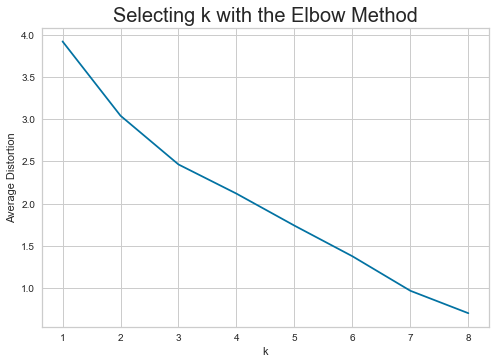

In [11]:
#Checking the distortion values for different clusters range (Elbow method)
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* It is not vizually clear where the Elbow method provides better distortion rates without over detailing the clusters, though since dataset is very small, the number of clusters should not be high to avoid clusters with only one or two observations.

For n_clusters = 2, silhouette score is 0.34250910347986846
For n_clusters = 3, silhouette score is 0.31999293557235675
For n_clusters = 4, silhouette score is 0.2128188336259944
For n_clusters = 5, silhouette score is 0.20364988714680915
For n_clusters = 6, silhouette score is 0.2184221141788222
For n_clusters = 7, silhouette score is 0.23696760099150102
For n_clusters = 8, silhouette score is 0.21108380601650145
For n_clusters = 9, silhouette score is 0.16326229972101666


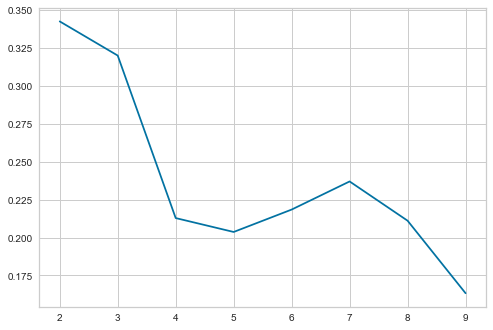

In [12]:
#Check the Shilhouette Score for further insights on the number of clusters
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* Silhouette Score has good improvement within 4 clusters, being a reasonable value to check the Silhouette plot.
* Silhouette Score for 9 clusters is also good, though it will have very small number of observations in each group due to the size of our dataframe. Therefore the clustering effect will be limited and almost individualized.

### For a visual observation of the Clusters 3, 4 and 5, check the graphs below.

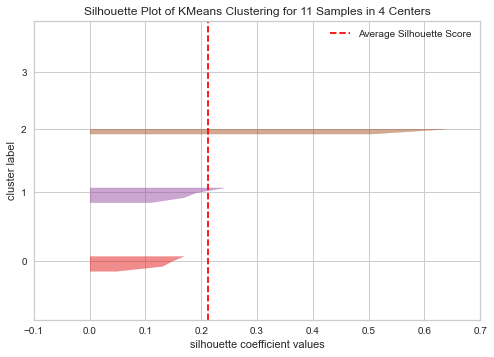

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 11 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

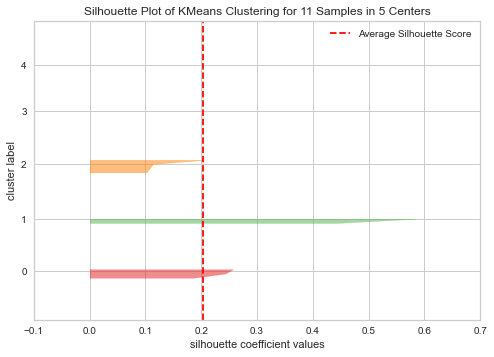

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 11 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

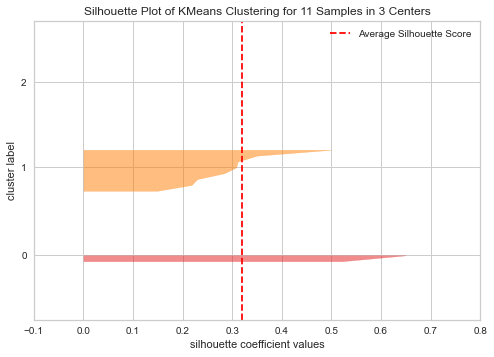

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 11 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

* In all graphs above the clusters lables do not surpass the average silhouette score. It would be preferable if all cluster labels values are over the Average Silhouette Score, which would certify that the clustering is working properly and the data points group well into the categories (clusters) created. 
* Despite of that, 4 cluster still looks better than the others.

### Using 4 Clusters to define the data

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [17]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [18]:
cluster_profile = df.groupby("K_means_segments").mean()

In [19]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Good taste"].count().values
)

In [20]:
# let's display cluster profiles and highlight the best coefficients in each attribute in lightgreen
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Rich full-bodied taste,Good taste,No aftertaste,Refreshing,Light,Lower price,Good value for money,Prestigious-popular,Masculine,Country with brewing tradition,For young people,Gives buzz,Drink at picnics & outings,Drink at bar,Drink with friends,For home after work,To serve guests at home,count_in_each_segment
K_means_segments,,,,,,,,,,,,,,,,,,
0,3.800000,3.900000,2.300000,2.800000,1.300000,1.600000,2.700000,2.500000,3.900000,3.300000,1.800000,3.100000,2.400000,3.700000,3.500000,3.800000,3.100000,1
1,3.425000,3.650000,3.100000,3.575000,2.650000,2.100000,2.950000,3.125000,2.775000,2.900000,2.600000,2.550000,3.375000,3.425000,3.550000,3.400000,3.475000,4
2,3.566667,3.633333,2.800000,3.266667,2.066667,1.633333,2.400000,3.133333,2.833333,3.400000,2.533333,2.933333,3.166667,3.433333,3.533333,3.466667,3.533333,3
3,3.500000,3.500000,2.900000,3.300000,1.800000,2.200000,2.000000,3.100000,3.300000,2.300000,2.100000,2.900000,3.300000,3.100000,3.500000,3.200000,3.000000,1
4,2.950000,3.050000,2.700000,2.950000,2.200000,1.850000,2.450000,2.550000,2.300000,2.450000,2.250000,2.450000,2.550000,2.650000,2.950000,2.850000,2.950000,2


* It is possible to see that cluster 3 has 7 attributes with the highest ratings in the group
* Cluster 2 has 6 attributes with the highest rates 
* Cluster 1 has no attributes with the higest rates
* Cluster 0 has four attributes with the highes rates

In [21]:
# let's display cluster profiles and highlight the worst coefficients in each attribute in lightgreen
cluster_profile.style.highlight_min(color="lightgreen", axis=0)

,Rich full-bodied taste,Good taste,No aftertaste,Refreshing,Light,Lower price,Good value for money,Prestigious-popular,Masculine,Country with brewing tradition,For young people,Gives buzz,Drink at picnics & outings,Drink at bar,Drink with friends,For home after work,To serve guests at home,count_in_each_segment
K_means_segments,,,,,,,,,,,,,,,,,,
0,3.800000,3.900000,2.300000,2.800000,1.300000,1.600000,2.700000,2.500000,3.900000,3.300000,1.800000,3.100000,2.400000,3.700000,3.500000,3.800000,3.100000,1
1,3.425000,3.650000,3.100000,3.575000,2.650000,2.100000,2.950000,3.125000,2.775000,2.900000,2.600000,2.550000,3.375000,3.425000,3.550000,3.400000,3.475000,4
2,3.566667,3.633333,2.800000,3.266667,2.066667,1.633333,2.400000,3.133333,2.833333,3.400000,2.533333,2.933333,3.166667,3.433333,3.533333,3.466667,3.533333,3
3,3.500000,3.500000,2.900000,3.300000,1.800000,2.200000,2.000000,3.100000,3.300000,2.300000,2.100000,2.900000,3.300000,3.100000,3.500000,3.200000,3.000000,1
4,2.950000,3.050000,2.700000,2.950000,2.200000,1.850000,2.450000,2.550000,2.300000,2.450000,2.250000,2.450000,2.550000,2.650000,2.950000,2.850000,2.950000,2


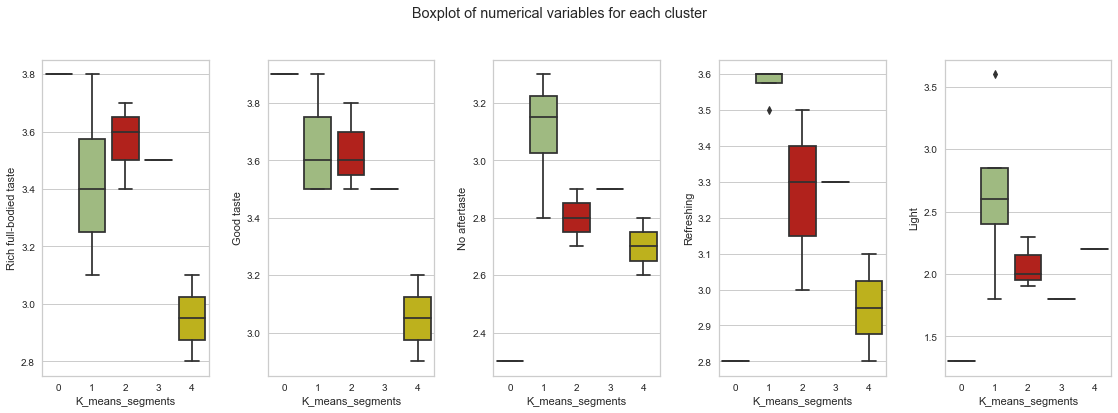

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

* Boxplots confirm the previous observations: cluster 3 has ratings higher than other Clusters in most segments.


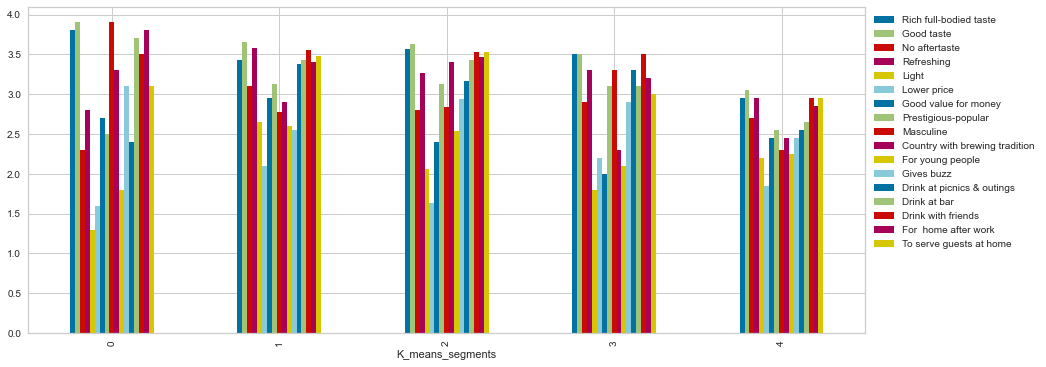

In [23]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))
plt.legend(bbox_to_anchor=(1.0, 1.0))

* The barplots show the average score of each attribute in the different groups.Even though there are lots of attributes to see, some insights can be drawn fro the graphs.
* Group 0 has one of the lowest scores on Lower Price, which includes the cheapest beers. Three Brands are part of this group, including Kirin.
* Group 1 has no beer with score above 3.0 in any category, while the lowest score in all categories is still above all other clusters (Lower Price). This group includes only 2 Brands.
* Group 2 has very high rates in some categories, but at the same time very low rates in others, which makes it "very special" product for one segment and include only one Brand "Bass".
* Group 3 has the highest numbers of Brands and highest scores in most attributes. The customers acceptability is higher and include the "famous" international Names. 

In [28]:
#Individual attributes values for Kirin
df.loc[df['Brands'] == 'Kirin']

,Brands,Rich full-bodied taste,Good taste,No aftertaste,Refreshing,Light,Lower price,Good value for money,Prestigious-popular,Masculine,Country with brewing tradition,For young people,Gives buzz,Drink at picnics & outings,Drink at bar,Drink with friends,For home after work,To serve guests at home,K_means_segments
6,Kirin,3.6,3.6,2.7,3.3,2.3,1.8,2.6,3.1,3.0,3.5,2.4,2.8,3.1,3.4,3.5,3.5,3.5,2


In [27]:
#Segment number for each beer
df[['Brands','K_means_segments']]

,Brands,K_means_segments
0,Amstel Light,1
1,Bass,0
2,Becks,2
3,Corona,1
4,Dos Equis,1
5,Heineken,3
6,Kirin,2
7,Molson,4
8,Moosehd,1
9,Sapporo,2


#### Conclusion
    Kirin top scores include: 
    => Prestigious-popular, 
    => Country with brewing tradition, 
    => For young people
    while the worst score include:
    => Good value for money

Based on the segmentation, Kirin seems to be more attractive to younger people with lower budget value. It is seen as a popular Brand but score value was tight with group 3, which includes the top global Brands, therefore it seems like Kirin recognition is in the same level as Heineken, Corona & Co. 


### In order to define a target segment for marketing it is necessary to check the next analysis related to Segmentation.